#### This is our first machine learning project, and at the same time the first competition that we participated in, me and my friend Khaled.

#### This is his github profile: [Khaled](https://github.com/Khaled-Saleh-KL1)

#### The link of the competition: [The skyfall conundrum](https://www.kaggle.com/competitions/the-skyfall-conundrum/overview)

#### Team's name: Khaled-Mohannad. Our score is **0.68642**

# **import packages**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier # machine algorithm that I used

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

# **Load the datasets and explore it**

In [2]:
df_train = pd.read_csv('cryptid_database_train.csv')
df_test = pd.read_csv('cryptid_database_test.csv')

In [3]:
df_train.head()

,IslandID,Island Size,Terrain Type,Vegetation Type,Distance from Mainland,Avg Temperature,Avg Humidity,Flora and Fauna Changes,Growth Patterns,Unexplain Sounds Count,Visual Anomalies,pH Change,Type
0,712,333.060006,Forested,Mixed Forests,500.939406,2.126074,72.828342,No Effect,Normal,High,Occasional,0.146254,Sasquatch
1,1727,326.745276,NaN,Mangroves,NaN,31.951421,79.771927,Increasing,Normal,Moderate,NaN,0.149703,Ropen
2,1359,NaN,Forested,Coniferous Forests,197.242470,12.564517,79.801094,Decreasing,Normal,NaN,Frequent,-0.202983,Wendigo
3,591,63.474524,Mountainous,Mixed Forests,333.862902,18.202615,47.982155,No Effect,Normal,High,Frequent,0.110638,Chupacabra
4,724,339.410940,Forested,Coniferous Forests,411.014013,-3.367113,78.075619,Increasing,Normal,Low,Occasional,0.157301,Sasquatch


In [4]:
df_test.head()

,IslandID,Island Size,Terrain Type,Vegetation Type,Distance from Mainland,Avg Temperature,Avg Humidity,Flora and Fauna Changes,Growth Patterns,Unexplain Sounds Count,Visual Anomalies,pH Change
0,482,315.169125,Forested,Deciduous Forests,234.930761,12.701562,85.707479,Increasing,Abnormal,Low,Frequent,0.001514
1,1507,27.178256,Urban settlements,Cultivated Land,322.505188,37.393392,57.810329,NaN,Abnormal,NaN,NaN,-0.132600
2,950,195.925075,Tundra,Tundra Vegetation,208.405671,-3.908834,59.765635,No Effect,Normal,Low,NaN,-0.006781
3,1005,187.688733,NaN,Deciduous Forests,430.930093,17.905631,NaN,Decreasing,Abnormal,Low,Frequent,-0.749830
4,705,186.561207,Forested,Deciduous Forests,487.502595,NaN,76.972178,Decreasing,Normal,Moderate,Frequent,-0.348837


In [5]:
#This is how my output should be just remove the type column with the prediction column
df_submission = pd.read_csv('sample_submission.csv')
df_submission.head()

,IslandID,Type
0,482,Wendigo
1,1507,Sasquatch
2,950,Sasquatch
3,1005,Mothman
4,705,Thunderbird


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219 entries, 0 to 1218
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   IslandID                 1219 non-null   int64  
 1   Island Size              1073 non-null   float64
 2   Terrain Type             1071 non-null   object 
 3   Vegetation Type          1106 non-null   object 
 4   Distance from Mainland   992 non-null    float64
 5   Avg Temperature          1121 non-null   float64
 6   Avg Humidity             1098 non-null   float64
 7   Flora and Fauna Changes  1033 non-null   object 
 8   Growth Patterns          1097 non-null   object 
 9   Unexplain Sounds Count   934 non-null    object 
 10  Visual Anomalies         751 non-null    object 
 11  pH Change                971 non-null    float64
 12  Type                     1219 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 123.9+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   IslandID                 523 non-null    int64  
 1   Island Size              443 non-null    float64
 2   Terrain Type             462 non-null    object 
 3   Vegetation Type          479 non-null    object 
 4   Distance from Mainland   419 non-null    float64
 5   Avg Temperature          482 non-null    float64
 6   Avg Humidity             475 non-null    float64
 7   Flora and Fauna Changes  448 non-null    object 
 8   Growth Patterns          471 non-null    object 
 9   Unexplain Sounds Count   400 non-null    object 
 10  Visual Anomalies         309 non-null    object 
 11  pH Change                423 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 49.2+ KB


In [8]:
df_train.isnull().sum()

IslandID                     0
Island Size                146
Terrain Type               148
Vegetation Type            113
Distance from Mainland     227
Avg Temperature             98
Avg Humidity               121
Flora and Fauna Changes    186
Growth Patterns            122
Unexplain Sounds Count     285
Visual Anomalies           468
pH Change                  248
Type                         0
dtype: int64

In [9]:
df_test.isnull().sum()

IslandID                     0
Island Size                 80
Terrain Type                61
Vegetation Type             44
Distance from Mainland     104
Avg Temperature             41
Avg Humidity                48
Flora and Fauna Changes     75
Growth Patterns             52
Unexplain Sounds Count     123
Visual Anomalies           214
pH Change                  100
dtype: int64

In [10]:
df_train.describe()

,IslandID,Island Size,Distance from Mainland,Avg Temperature,Avg Humidity,pH Change
count,1219.000000,1073.000000,992.000000,1121.000000,1098.000000,971.000000
mean,868.639048,180.886850,311.120381,14.164876,65.466987,-0.044618
std,506.564214,107.404556,146.526884,9.787656,16.920856,0.284886
min,0.000000,5.156844,29.113240,-13.164267,0.000000,-1.082992
25%,432.500000,62.479234,195.444813,7.863346,57.721108,-0.221935
50%,873.000000,195.618155,294.819004,13.837993,68.392506,0.049323
75%,1308.000000,265.388173,409.028758,20.134942,77.045792,0.130363
max,1741.000000,450.517276,726.067858,50.266460,99.700926,0.702001


In [11]:
df_test.describe()

,IslandID,Island Size,Distance from Mainland,Avg Temperature,Avg Humidity,pH Change
count,523.000000,443.000000,419.000000,482.000000,475.000000,423.000000
mean,874.837476,172.281650,301.517255,13.825094,66.540110,-0.050269
std,495.101753,108.044631,139.824932,9.778091,15.815735,0.297474
min,15.000000,0.146902,39.244497,-16.245950,10.040232,-1.257222
25%,444.500000,52.046019,190.413694,7.791041,57.695135,-0.227838
50%,859.000000,194.211709,279.782303,13.628949,69.334571,0.049509
75%,1296.000000,254.799638,402.985454,19.275790,77.935847,0.148426
max,1740.000000,419.026722,698.205837,50.703337,96.519098,0.652699


### Let's try to do some plots to see what to do.

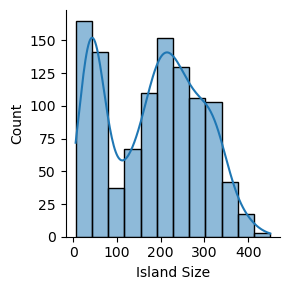

In [12]:
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

sns.displot(df_train['Island Size'], kind='hist', kde=True, height=3)
plt.show()
# Here I can't say that I should use mean because the shape is not bell-shape. Also, I can't say let's
# use the median because the shape is not left or right skewed so I'll try to use KNN.
# It finds the k closest observations to the one with the missing value and takes the
# average of their values to fill in the gap.

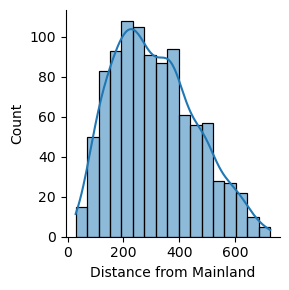

In [13]:
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

sns.displot(df_train['Distance from Mainland'], kind='hist', kde=True, height=3)
plt.show()
# This is right-skewed so use median to handle the missing data

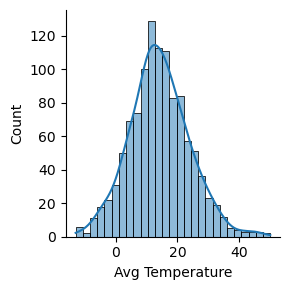

In [14]:
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

sns.displot(df_train['Avg Temperature'], kind='hist', kde=True, height=3)
plt.show()
# This is bell-shape so use mean to handle the missing data

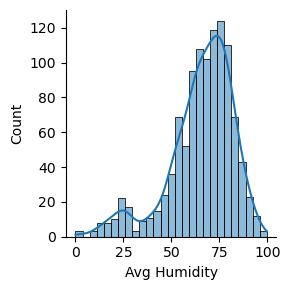

In [15]:
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

sns.displot(df_train['Avg Humidity'], kind='hist', kde=True, height=3)
plt.show()
# This is left-skewed so use median to handle the missing data

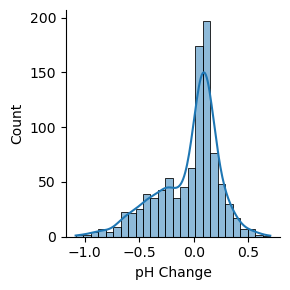

In [16]:
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

sns.displot(df_train['pH Change'], kind='hist', kde=True, height=3)
plt.show()
# This is left skewed so use median to handle the missing data

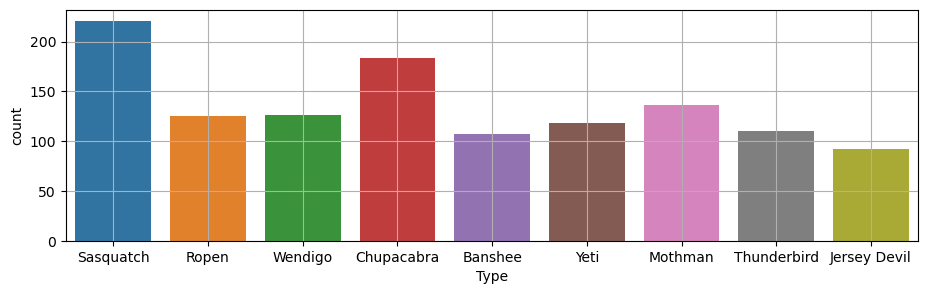

In [17]:
plt.figure(figsize=(11,3))
sns.countplot(df_train, x=df_train['Type'])
plt.grid()
plt.show()
# The data is somehow balanced.I'll try to fill the numeric data depending on the types.

# **Cleaning the training data**

In [18]:
df_train = df_train.drop('IslandID', axis=1)

In [19]:
df_train.head(3)

,Island Size,Terrain Type,Vegetation Type,Distance from Mainland,Avg Temperature,Avg Humidity,Flora and Fauna Changes,Growth Patterns,Unexplain Sounds Count,Visual Anomalies,pH Change,Type
0,333.060006,Forested,Mixed Forests,500.939406,2.126074,72.828342,No Effect,Normal,High,Occasional,0.146254,Sasquatch
1,326.745276,NaN,Mangroves,NaN,31.951421,79.771927,Increasing,Normal,Moderate,NaN,0.149703,Ropen
2,NaN,Forested,Coniferous Forests,197.242470,12.564517,79.801094,Decreasing,Normal,NaN,Frequent,-0.202983,Wendigo


In [20]:
df_train.isnull().sum()

Island Size                146
Terrain Type               148
Vegetation Type            113
Distance from Mainland     227
Avg Temperature             98
Avg Humidity               121
Flora and Fauna Changes    186
Growth Patterns            122
Unexplain Sounds Count     285
Visual Anomalies           468
pH Change                  248
Type                         0
dtype: int64

**KNN in the `Island Size` (numeric) depending on the plot above**

In [21]:
knn = KNNImputer(n_neighbors=3)
knn.fit(df_train['Island Size'].values.reshape(-1,1))
df_train['Island Size'] = knn.transform(df_train['Island Size'].values.\
                                  reshape(-1,1)).ravel()

#### **Depending on the plots above**

**`Distance from Mainland` use --*median*-- and fill the nan values**

**`Avg Temperature` use --*mean*-- and fill the nan values**

**`Avg Humidity` use --*median*-- and fill the nan values**

**`pH Change` use --*median*-- and fill the nan values**

## I will fill the nan values in the `Distance from Mainland` with the median of the column but each Type seperately

In [22]:
df_train.groupby('Type')['Distance from Mainland'].median()

Type
Banshee         353.134170
Chupacabra      295.074621
Jersey Devil    256.893676
Mothman         285.594491
Ropen           261.172187
Sasquatch       311.827532
Thunderbird     268.862876
Wendigo         303.704243
Yeti            329.962863
Name: Distance from Mainland, dtype: float64

In [23]:
Distance_median = df_train.groupby('Type').get_group('Banshee')['Distance from Mainland'].median()

df_train.loc[df_train['Type'] == 'Banshee', 'Distance from Mainland'] =\
df_train.groupby('Type').get_group('Banshee')['Distance from Mainland'].fillna(Distance_median)
#------------------------------------------------------------------------------------------------
Distance_median = df_train.groupby('Type').get_group('Chupacabra')['Distance from Mainland'].median()

df_train.loc[df_train['Type'] == 'Chupacabra', 'Distance from Mainland'] =\
df_train.groupby('Type').get_group('Chupacabra')['Distance from Mainland'].fillna(Distance_median)
#------------------------------------------------------------------------------------------------
Distance_median = df_train.groupby('Type').get_group('Jersey Devil')['Distance from Mainland'].median()

df_train.loc[df_train['Type'] == 'Jersey Devil', 'Distance from Mainland'] =\
df_train.groupby('Type').get_group('Jersey Devil')['Distance from Mainland'].fillna(Distance_median)
#------------------------------------------------------------------------------------------------
Distance_median = df_train.groupby('Type').get_group('Mothman')['Distance from Mainland'].median()

df_train.loc[df_train['Type'] == 'Mothman', 'Distance from Mainland'] =\
df_train.groupby('Type').get_group('Mothman')['Distance from Mainland'].fillna(Distance_median)
#------------------------------------------------------------------------------------------------
Distance_median = df_train.groupby('Type').get_group('Ropen')['Distance from Mainland'].median()

df_train.loc[df_train['Type'] == 'Ropen', 'Distance from Mainland'] =\
df_train.groupby('Type').get_group('Ropen')['Distance from Mainland'].fillna(Distance_median)
#------------------------------------------------------------------------------------------------
Distance_median = df_train.groupby('Type').get_group('Sasquatch')['Distance from Mainland'].median()

df_train.loc[df_train['Type'] == 'Sasquatch', 'Distance from Mainland'] =\
df_train.groupby('Type').get_group('Sasquatch')['Distance from Mainland'].fillna(Distance_median)
#------------------------------------------------------------------------------------------------
Distance_median = df_train.groupby('Type').get_group('Thunderbird')['Distance from Mainland'].median()

df_train.loc[df_train['Type'] == 'Thunderbird', 'Distance from Mainland'] =\
df_train.groupby('Type').get_group('Thunderbird')['Distance from Mainland'].fillna(Distance_median)
#------------------------------------------------------------------------------------------------
Distance_median = df_train.groupby('Type').get_group('Wendigo')['Distance from Mainland'].median()

df_train.loc[df_train['Type'] == 'Wendigo', 'Distance from Mainland'] =\
df_train.groupby('Type').get_group('Wendigo')['Distance from Mainland'].fillna(Distance_median)
#------------------------------------------------------------------------------------------------
Distance_median = df_train.groupby('Type').get_group('Yeti')['Distance from Mainland'].median()

df_train.loc[df_train['Type'] == 'Yeti', 'Distance from Mainland'] =\
df_train.groupby('Type').get_group('Yeti')['Distance from Mainland'].fillna(Distance_median)

## I will fill the nan values in the `Avg Temperature` with the mean of the column but each Type seperately

In [24]:
df_train.groupby('Type')['Avg Temperature'].mean()

Type
Banshee         16.899348
Chupacabra      20.489720
Jersey Devil    16.958992
Mothman         18.573970
Ropen           13.588536
Sasquatch       10.800995
Thunderbird     14.763035
Wendigo         10.366102
Yeti             5.394208
Name: Avg Temperature, dtype: float64

In [25]:
Temperature_mean = df_train.groupby('Type').get_group('Banshee')['Avg Temperature'].mean()

df_train.loc[df_train['Type'] == 'Banshee', 'Avg Temperature'] =\
df_train.groupby('Type').get_group('Banshee')['Avg Temperature'].fillna(Temperature_mean)
#------------------------------------------------------------------------------------------------
Temperature_mean = df_train.groupby('Type').get_group('Chupacabra')['Avg Temperature'].mean()

df_train.loc[df_train['Type'] == 'Chupacabra', 'Avg Temperature'] =\
df_train.groupby('Type').get_group('Chupacabra')['Avg Temperature'].fillna(Temperature_mean)
#------------------------------------------------------------------------------------------------
Temperature_mean = df_train.groupby('Type').get_group('Jersey Devil')['Avg Temperature'].mean()

df_train.loc[df_train['Type'] == 'Jersey Devil', 'Avg Temperature'] =\
df_train.groupby('Type').get_group('Jersey Devil')['Avg Temperature'].fillna(Temperature_mean)
#------------------------------------------------------------------------------------------------
Temperature_mean = df_train.groupby('Type').get_group('Mothman')['Avg Temperature'].mean()

df_train.loc[df_train['Type'] == 'Mothman', 'Avg Temperature'] =\
df_train.groupby('Type').get_group('Mothman')['Avg Temperature'].fillna(Temperature_mean)
#------------------------------------------------------------------------------------------------
Temperature_mean = df_train.groupby('Type').get_group('Ropen')['Avg Temperature'].mean()

df_train.loc[df_train['Type'] == 'Ropen', 'Avg Temperature'] =\
df_train.groupby('Type').get_group('Ropen')['Avg Temperature'].fillna(Temperature_mean)
#------------------------------------------------------------------------------------------------
Temperature_mean = df_train.groupby('Type').get_group('Sasquatch')['Avg Temperature'].mean()

df_train.loc[df_train['Type'] == 'Sasquatch', 'Avg Temperature'] =\
df_train.groupby('Type').get_group('Sasquatch')['Avg Temperature'].fillna(Temperature_mean)
#------------------------------------------------------------------------------------------------
Temperature_mean = df_train.groupby('Type').get_group('Thunderbird')['Avg Temperature'].mean()

df_train.loc[df_train['Type'] == 'Thunderbird', 'Avg Temperature'] =\
df_train.groupby('Type').get_group('Thunderbird')['Avg Temperature'].fillna(Temperature_mean)
#------------------------------------------------------------------------------------------------
Temperature_mean = df_train.groupby('Type').get_group('Wendigo')['Avg Temperature'].mean()

df_train.loc[df_train['Type'] == 'Wendigo', 'Avg Temperature'] =\
df_train.groupby('Type').get_group('Wendigo')['Avg Temperature'].fillna(Temperature_mean)
#------------------------------------------------------------------------------------------------
Temperature_mean = df_train.groupby('Type').get_group('Yeti')['Avg Temperature'].mean()

df_train.loc[df_train['Type'] == 'Yeti', 'Avg Temperature'] =\
df_train.groupby('Type').get_group('Yeti')['Avg Temperature'].fillna(Temperature_mean)

## I will fill the nan values in the `Avg Humidity` with the median of the column but each Type seperately

In [26]:
df_train.groupby('Type')['Avg Humidity'].median()

Type
Banshee         63.835949
Chupacabra      42.498419
Jersey Devil    77.274127
Mothman         66.396324
Ropen           73.651144
Sasquatch       71.921799
Thunderbird     65.080004
Wendigo         73.250994
Yeti            67.658274
Name: Avg Humidity, dtype: float64

In [27]:
Humidity_median = df_train.groupby('Type').get_group('Banshee')['Avg Humidity'].median()

df_train.loc[df_train['Type'] == 'Banshee', 'Avg Humidity'] =\
df_train.groupby('Type').get_group('Banshee')['Avg Humidity'].fillna(Humidity_median)
#------------------------------------------------------------------------------------------------
Humidity_median = df_train.groupby('Type').get_group('Chupacabra')['Avg Humidity'].median()

df_train.loc[df_train['Type'] == 'Chupacabra', 'Avg Humidity'] =\
df_train.groupby('Type').get_group('Chupacabra')['Avg Humidity'].fillna(Humidity_median)
#------------------------------------------------------------------------------------------------
Humidity_median = df_train.groupby('Type').get_group('Jersey Devil')['Avg Humidity'].median()

df_train.loc[df_train['Type'] == 'Jersey Devil', 'Avg Humidity'] =\
df_train.groupby('Type').get_group('Jersey Devil')['Avg Humidity'].fillna(Humidity_median)
#------------------------------------------------------------------------------------------------
Humidity_median = df_train.groupby('Type').get_group('Mothman')['Avg Humidity'].median()

df_train.loc[df_train['Type'] == 'Mothman', 'Avg Humidity'] =\
df_train.groupby('Type').get_group('Mothman')['Avg Humidity'].fillna(Humidity_median)
#------------------------------------------------------------------------------------------------
Humidity_median = df_train.groupby('Type').get_group('Ropen')['Avg Humidity'].median()

df_train.loc[df_train['Type'] == 'Ropen', 'Avg Humidity'] =\
df_train.groupby('Type').get_group('Ropen')['Avg Humidity'].fillna(Humidity_median)
#------------------------------------------------------------------------------------------------
Humidity_median = df_train.groupby('Type').get_group('Sasquatch')['Avg Humidity'].median()

df_train.loc[df_train['Type'] == 'Sasquatch', 'Avg Humidity'] =\
df_train.groupby('Type').get_group('Sasquatch')['Avg Humidity'].fillna(Humidity_median)
#------------------------------------------------------------------------------------------------
Humidity_median = df_train.groupby('Type').get_group('Thunderbird')['Avg Humidity'].median()

df_train.loc[df_train['Type'] == 'Thunderbird', 'Avg Humidity'] =\
df_train.groupby('Type').get_group('Thunderbird')['Avg Humidity'].fillna(Humidity_median)
#------------------------------------------------------------------------------------------------
Humidity_median = df_train.groupby('Type').get_group('Wendigo')['Avg Humidity'].median()

df_train.loc[df_train['Type'] == 'Wendigo', 'Avg Humidity'] =\
df_train.groupby('Type').get_group('Wendigo')['Avg Humidity'].fillna(Humidity_median)
#------------------------------------------------------------------------------------------------
Humidity_median = df_train.groupby('Type').get_group('Yeti')['Avg Humidity'].median()

df_train.loc[df_train['Type'] == 'Yeti', 'Avg Humidity'] =\
df_train.groupby('Type').get_group('Yeti')['Avg Humidity'].fillna(Humidity_median)

## I will fill the nan values in the `pH Change` with the median of the column but each Type seperately

In [28]:
df_train.groupby('Type')['pH Change'].median()

Type
Banshee        -0.215239
Chupacabra      0.098289
Jersey Devil   -0.397981
Mothman        -0.264090
Ropen           0.198555
Sasquatch       0.099990
Thunderbird     0.281473
Wendigo        -0.480307
Yeti            0.011254
Name: pH Change, dtype: float64

In [29]:
PH_median = df_train.groupby('Type').get_group('Banshee')['pH Change'].median()

df_train.loc[df_train['Type'] == 'Banshee', 'pH Change'] =\
df_train.groupby('Type').get_group('Banshee')['pH Change'].fillna(PH_median)
#------------------------------------------------------------------------------------------------
PH_median = df_train.groupby('Type').get_group('Chupacabra')['pH Change'].median()

df_train.loc[df_train['Type'] == 'Chupacabra', 'pH Change'] =\
df_train.groupby('Type').get_group('Chupacabra')['pH Change'].fillna(PH_median)
#------------------------------------------------------------------------------------------------
PH_median = df_train.groupby('Type').get_group('Jersey Devil')['pH Change'].median()

df_train.loc[df_train['Type'] == 'Jersey Devil', 'pH Change'] =\
df_train.groupby('Type').get_group('Jersey Devil')['pH Change'].fillna(PH_median)
#------------------------------------------------------------------------------------------------
PH_median = df_train.groupby('Type').get_group('Mothman')['pH Change'].median()

df_train.loc[df_train['Type'] == 'Mothman', 'pH Change'] =\
df_train.groupby('Type').get_group('Mothman')['pH Change'].fillna(PH_median)
#------------------------------------------------------------------------------------------------
PH_median = df_train.groupby('Type').get_group('Ropen')['pH Change'].median()

df_train.loc[df_train['Type'] == 'Ropen', 'pH Change'] =\
df_train.groupby('Type').get_group('Ropen')['pH Change'].fillna(PH_median)
#------------------------------------------------------------------------------------------------
PH_median = df_train.groupby('Type').get_group('Sasquatch')['pH Change'].median()

df_train.loc[df_train['Type'] == 'Sasquatch', 'pH Change'] =\
df_train.groupby('Type').get_group('Sasquatch')['pH Change'].fillna(PH_median)
#------------------------------------------------------------------------------------------------
PH_median = df_train.groupby('Type').get_group('Thunderbird')['pH Change'].median()

df_train.loc[df_train['Type'] == 'Thunderbird', 'pH Change'] =\
df_train.groupby('Type').get_group('Thunderbird')['pH Change'].fillna(PH_median)
#------------------------------------------------------------------------------------------------
PH_median = df_train.groupby('Type').get_group('Wendigo')['pH Change'].median()

df_train.loc[df_train['Type'] == 'Wendigo', 'pH Change'] =\
df_train.groupby('Type').get_group('Wendigo')['pH Change'].fillna(PH_median)
#------------------------------------------------------------------------------------------------
PH_median = df_train.groupby('Type').get_group('Yeti')['pH Change'].median()

df_train.loc[df_train['Type'] == 'Yeti', 'pH Change'] =\
df_train.groupby('Type').get_group('Yeti')['pH Change'].fillna(PH_median)

In [30]:
df_train.isnull().sum()

Island Size                  0
Terrain Type               148
Vegetation Type            113
Distance from Mainland       0
Avg Temperature              0
Avg Humidity                 0
Flora and Fauna Changes    186
Growth Patterns            122
Unexplain Sounds Count     285
Visual Anomalies           468
pH Change                    0
Type                         0
dtype: int64

## Now let's handle the missing values on categorical columns. First of all I'll not drop the missing values because it is maybe 20% of the data so this is very bad choice. let's fill the data with the most frequent value using mode ?

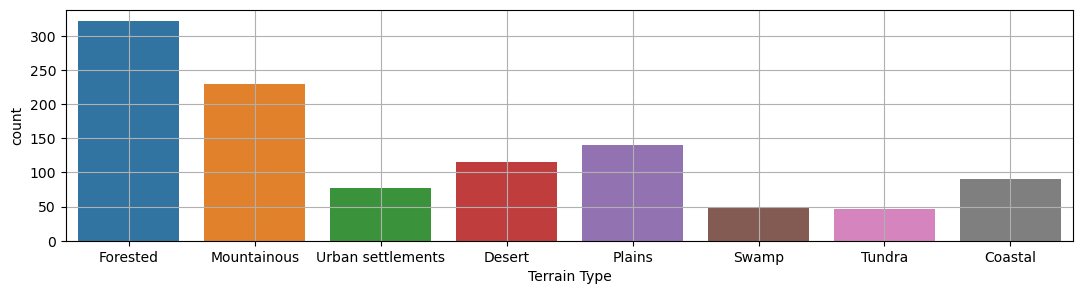

In [31]:
plt.figure(figsize=(13,3))
sns.countplot(df_train, x=df_train['Terrain Type'])
plt.grid()
plt.show()
# The data is umbalanced. (I'll use one hot)

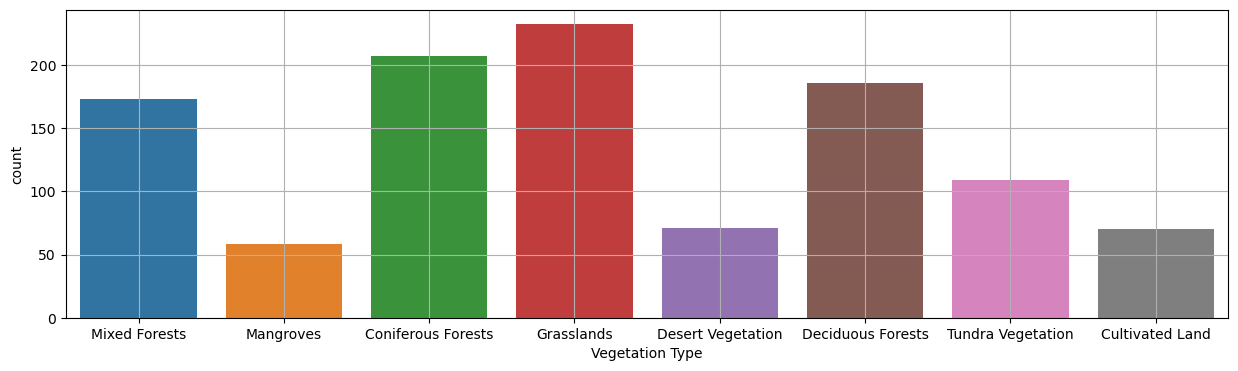

In [32]:
plt.figure(figsize=(15,4))
sns.countplot(df_train, x=df_train['Vegetation Type'])
plt.grid()
plt.show()
# The data is umbalanced. (I'll use one hot)

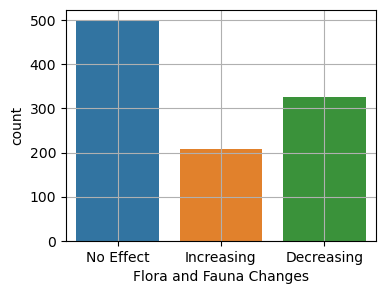

In [33]:
plt.figure(figsize=(4,3))
sns.countplot(df_train, x=df_train['Flora and Fauna Changes'])
plt.grid()
plt.show()
# The data is umbalanced. (I'll use one hot)

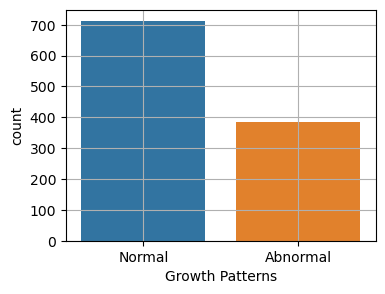

In [34]:
plt.figure(figsize=(4,3))
sns.countplot(df_train, x=df_train['Growth Patterns'])
plt.grid()
plt.show()
# The data is balanced. (I'll use LabelEncoder)

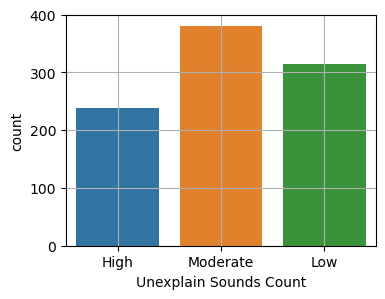

In [35]:
plt.figure(figsize=(4,3))
sns.countplot(df_train, x=df_train['Unexplain Sounds Count'])
plt.grid()
plt.show()
# The data is balanced. (I'll use one hot)

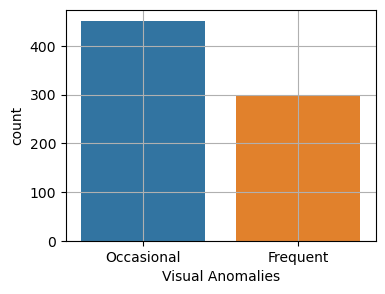

In [36]:
plt.figure(figsize=(4,3))
sns.countplot(df_train, x=df_train['Visual Anomalies'])
plt.grid()
plt.show()
# The data is balanced. (I'll use LabelEncoder)

In [37]:
df_train.head()

,Island Size,Terrain Type,Vegetation Type,Distance from Mainland,Avg Temperature,Avg Humidity,Flora and Fauna Changes,Growth Patterns,Unexplain Sounds Count,Visual Anomalies,pH Change,Type
0,333.060006,Forested,Mixed Forests,500.939406,2.126074,72.828342,No Effect,Normal,High,Occasional,0.146254,Sasquatch
1,326.745276,NaN,Mangroves,261.172187,31.951421,79.771927,Increasing,Normal,Moderate,NaN,0.149703,Ropen
2,180.886850,Forested,Coniferous Forests,197.242470,12.564517,79.801094,Decreasing,Normal,NaN,Frequent,-0.202983,Wendigo
3,63.474524,Mountainous,Mixed Forests,333.862902,18.202615,47.982155,No Effect,Normal,High,Frequent,0.110638,Chupacabra
4,339.410940,Forested,Coniferous Forests,411.014013,-3.367113,78.075619,Increasing,Normal,Low,Occasional,0.157301,Sasquatch


In [38]:
df_train.isnull().sum()

Island Size                  0
Terrain Type               148
Vegetation Type            113
Distance from Mainland       0
Avg Temperature              0
Avg Humidity                 0
Flora and Fauna Changes    186
Growth Patterns            122
Unexplain Sounds Count     285
Visual Anomalies           468
pH Change                    0
Type                         0
dtype: int64

In [39]:
df_train['Terrain Type'].mode() # ==> Forested
df_train['Terrain Type'] = df_train['Terrain Type'].fillna('Forested')

In [40]:
df_train['Vegetation Type'].mode() # ==> Grasslands
df_train['Vegetation Type'] = df_train['Vegetation Type'].fillna('Grasslands')

In [41]:
df_train['Flora and Fauna Changes'].mode() # ==> No Effect
df_train['Flora and Fauna Changes'] = df_train['Flora and Fauna Changes'].fillna('No Effect')

In [42]:
df_train['Growth Patterns'].mode() # ==> Normal
df_train['Growth Patterns'] = df_train['Growth Patterns'].fillna('Normal')

In [43]:
df_train['Unexplain Sounds Count'].mode() # ==> Moderate
df_train['Unexplain Sounds Count'] = df_train['Unexplain Sounds Count'].fillna('Moderate')

In [44]:
df_train['Visual Anomalies'].mode() # ==> Occasional
df_train['Visual Anomalies'] = df_train['Visual Anomalies'].fillna('Occasional')

In [45]:
df_train.isnull().sum()

Island Size                0
Terrain Type               0
Vegetation Type            0
Distance from Mainland     0
Avg Temperature            0
Avg Humidity               0
Flora and Fauna Changes    0
Growth Patterns            0
Unexplain Sounds Count     0
Visual Anomalies           0
pH Change                  0
Type                       0
dtype: int64

#### ['Terrain Type']  --> one hot
#### ['Vegetation Type'] --> one hot
#### ['Flora and Fauna Changes'] --> one hot
#### ['Growth Patterns'] --> LabelEncoder
#### ['Unexplain Sounds Count'] --> one hot
#### ['Visual Anomalies'] --> LabelEncoder

In [46]:
df_test_cate = df_train.loc[:, ['Growth Patterns', 'Visual Anomalies']]

label_encoders = {}

for col in df_test_cate.columns:
    le = LabelEncoder()
    df_test_cate[col] = le.fit_transform(df_test_cate[col])
    label_encoders[col] = le
    
df_train.loc[:, ['Growth Patterns', 'Visual Anomalies']] = df_test_cate

In [47]:
ohe = OneHotEncoder()

In [48]:
columns_to_encode = ['Terrain Type', 'Vegetation Type', 'Flora and Fauna Changes', 'Unexplain Sounds Count']

# empty DataFrame to store the encoded data
encoded_data_frames = []

for column in columns_to_encode:
    column_data = df_train[[column]]
    encoded_data = ohe.fit_transform(column_data)
    encoded_df = pd.DataFrame(encoded_data.toarray(), columns=ohe.get_feature_names_out([column]))
    encoded_data_frames.append(encoded_df)

encoded_combined = pd.concat(encoded_data_frames, axis=1)

df_train.drop(columns=columns_to_encode, inplace=True)  # Remove the original columns
df_train = pd.concat([df_train, encoded_combined], axis=1)   # Concatenate the encoded DataFrames

# **Building the model using training data**

In [49]:
ptf = PowerTransformer() # normalizing the features

In [50]:
# df_train.shape     (1219, 13)
X = df_train.drop('Type', axis=1)
y = df_train['Type']

In [51]:
X = ptf.fit_transform(X)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# **Using Random Forest on training data**

In [53]:
rfc = RandomForestClassifier(criterion='entropy', n_estimators=300)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

**عشان اعرف متى بوقف, كل وحدة فيهم الها معادلة**
`gini`
`Entropy`
`log_loss`

In [54]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

     Banshee       0.73      0.79      0.76        14
  Chupacabra       0.80      0.90      0.85        31
Jersey Devil       0.72      0.76      0.74        17
     Mothman       0.70      0.50      0.58        28
       Ropen       0.56      0.56      0.56        27
   Sasquatch       0.81      0.83      0.82        47
 Thunderbird       0.80      0.59      0.68        27
     Wendigo       0.80      1.00      0.89        24
        Yeti       0.87      0.93      0.90        29

    accuracy                           0.77       244
   macro avg       0.75      0.76      0.75       244
weighted avg       0.76      0.77      0.76       244



# **Cleaning testing data**

In [55]:
df_test = df_test.drop('IslandID', axis=1)

In [56]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Island Size              443 non-null    float64
 1   Terrain Type             462 non-null    object 
 2   Vegetation Type          479 non-null    object 
 3   Distance from Mainland   419 non-null    float64
 4   Avg Temperature          482 non-null    float64
 5   Avg Humidity             475 non-null    float64
 6   Flora and Fauna Changes  448 non-null    object 
 7   Growth Patterns          471 non-null    object 
 8   Unexplain Sounds Count   400 non-null    object 
 9   Visual Anomalies         309 non-null    object 
 10  pH Change                423 non-null    float64
dtypes: float64(5), object(6)
memory usage: 45.1+ KB


In [57]:
df_test.isnull().sum()

Island Size                 80
Terrain Type                61
Vegetation Type             44
Distance from Mainland     104
Avg Temperature             41
Avg Humidity                48
Flora and Fauna Changes     75
Growth Patterns             52
Unexplain Sounds Count     123
Visual Anomalies           214
pH Change                  100
dtype: int64

In [58]:
# df_test['Terrain Type'].mode() # ==> Forested
df_test['Terrain Type'] = df_test['Terrain Type'].fillna('Forested')

In [59]:
# df_test['Vegetation Type'].mode() # ==> Coniferous Forests
df_test['Vegetation Type'] = df_test['Vegetation Type'].fillna('Coniferous Forests')

In [60]:
# df_test['Flora and Fauna Changes'].mode() # ==> No Effect
df_test['Flora and Fauna Changes'] = df_test['Flora and Fauna Changes'].fillna('No Effect')

In [61]:
# df_test['Growth Patterns'].mode() # ==> Normal
df_test['Growth Patterns'] = df_test['Growth Patterns'].fillna('Normal')

In [62]:
# df_test['Unexplain Sounds Count'].mode() # ==> Low
df_test['Unexplain Sounds Count'] = df_test['Unexplain Sounds Count'].fillna('Low')

In [63]:
df_test['Visual Anomalies'].mode() # ==> Occasional
df_test['Visual Anomalies'] = df_test['Visual Anomalies'].fillna('Occasional')

In [64]:
distance = df_test['Distance from Mainland'].median()
df_test['Distance from Mainland'] = df_test['Distance from Mainland'].fillna(distance)

In [65]:
distance = df_test['Avg Temperature'].mean()
df_test['Avg Temperature'] = df_test['Avg Temperature'].fillna(distance)

In [66]:
distance = df_test['Avg Humidity'].median()
df_test['Avg Humidity'] = df_test['Avg Humidity'].fillna(distance)

In [67]:
distance = df_test['pH Change'].median()
df_test['pH Change'] = df_test['pH Change'].fillna(distance)

In [68]:
knn = KNNImputer(n_neighbors=3)
knn.fit(df_test['Island Size'].values.reshape(-1,1))
df_test['Island Size'] = knn.transform(df_test['Island Size'].values.\
                                  reshape(-1,1)).ravel()

In [69]:
df_test.isnull().sum()

Island Size                0
Terrain Type               0
Vegetation Type            0
Distance from Mainland     0
Avg Temperature            0
Avg Humidity               0
Flora and Fauna Changes    0
Growth Patterns            0
Unexplain Sounds Count     0
Visual Anomalies           0
pH Change                  0
dtype: int64

# **Using LabelEncoder & OneHotEncoder on testing data**

In [70]:
df_test_cate = df_test.loc[:, ['Growth Patterns', 'Visual Anomalies']]

label_encoders = {}

for col in df_test_cate.columns:
    le = LabelEncoder()
    df_test_cate[col] = le.fit_transform(df_test_cate[col])
    label_encoders[col] = le
    
df_test.loc[:, ['Growth Patterns', 'Visual Anomalies']] = df_test_cate

In [71]:
columns_to_encode = ['Terrain Type', 'Vegetation Type', 'Flora and Fauna Changes', 'Unexplain Sounds Count']

# empty DataFrame to store the encoded data
encoded_data_frames = []

for column in columns_to_encode:
    column_data = df_test[[column]]
    encoded_data = ohe.fit_transform(column_data)
    encoded_df = pd.DataFrame(encoded_data.toarray(), columns=ohe.get_feature_names_out([column]))
    encoded_data_frames.append(encoded_df)

encoded_combined = pd.concat(encoded_data_frames, axis=1)

df_test.drop(columns=columns_to_encode, inplace=True)  # Remove the original columns
df_test = pd.concat([df_test, encoded_combined], axis=1)   # Concatenate the encoded DataFrames

In [72]:
df_test.isnull().sum()

Island Size                           0
Distance from Mainland                0
Avg Temperature                       0
Avg Humidity                          0
Growth Patterns                       0
Visual Anomalies                      0
pH Change                             0
Terrain Type_Coastal                  0
Terrain Type_Desert                   0
Terrain Type_Forested                 0
Terrain Type_Mountainous              0
Terrain Type_Plains                   0
Terrain Type_Swamp                    0
Terrain Type_Tundra                   0
Terrain Type_Urban settlements        0
Vegetation Type_Coniferous Forests    0
Vegetation Type_Cultivated Land       0
Vegetation Type_Deciduous Forests     0
Vegetation Type_Desert Vegetation     0
Vegetation Type_Grasslands            0
Vegetation Type_Mangroves             0
Vegetation Type_Mixed Forests         0
Vegetation Type_Tundra Vegetation     0
Flora and Fauna Changes_Decreasing    0
Flora and Fauna Changes_Increasing    0


In [73]:
X_train = ptf.fit_transform(X_train)

# **Random forest testing data**

In [80]:
rfc = RandomForestClassifier(n_estimators=400, criterion='log_loss')

In [81]:
rfc.fit(X_train, y_train)
df_test_pred = rfc.predict(X_test)

In [82]:
print(classification_report(df_test_pred, y_test))

              precision    recall  f1-score   support

     Banshee       0.79      0.58      0.67        19
  Chupacabra       0.87      0.77      0.82        35
Jersey Devil       0.59      0.62      0.61        16
     Mothman       0.46      0.76      0.58        17
       Ropen       0.63      0.61      0.62        28
   Sasquatch       0.83      0.76      0.80        51
 Thunderbird       0.56      0.94      0.70        16
     Wendigo       1.00      0.80      0.89        30
        Yeti       0.93      0.84      0.89        32

    accuracy                           0.75       244
   macro avg       0.74      0.74      0.73       244
weighted avg       0.78      0.75      0.76       244



# **let's train the model on the hole training data and test it with the df_test data**

In [83]:
X = df_train.drop('Type', axis=1)
y = df_train['Type']
rfc.fit(X, y)
df_test_pred = rfc.predict(df_test)

In [84]:
df_submission['Type'] = df_test_pred

In [85]:
df_submission.to_csv('KL1_predict.csv', index=False)

In [86]:
df_submission.head()

,IslandID,Type
0,482,Sasquatch
1,1507,Banshee
2,950,Yeti
3,1005,Wendigo
4,705,Wendigo
